In [1]:
%cd /content/drive/MyDrive/Kiemtra_AI/Fingerprint/Fingerprint

/content/drive/MyDrive/Kiemtra_AI/Fingerprint/Fingerprint


In [2]:
#mo hinh CNN
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, Dropout
from keras.layers import LeakyReLU

In [3]:
#Tạo ra class ImageDataGenerator để chỉnh sửa ảnh
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range =0.2, horizontal_flip = True)

In [4]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Kiemtra_AI/Fingerprint/Fingerprint/Train', target_size = (150,150), batch_size = 32, class_mode ='categorical')

Found 404 images belonging to 5 classes.


In [5]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu',padding='same',input_shape=(150,150,3))) 
#ham loai bo
model.add(LeakyReLU(alpha = 0.1))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))

# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', padding='same')) 
#ham loai bo
model.add(LeakyReLU(alpha = 0.1))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))

# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu',padding='same')) 
#ham loai bo
model.add(LeakyReLU(alpha = 0.1))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))


# Duỗi thẳng dữ liệu 
model.add(Flatten())

# Tạo lớp thứ nhất với 256 tín hiệu ra
model.add(Dense(256,activation='relu'))
# Tạo lớp thứ hai với 3 tín hiệu ra
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [6]:
from keras.utils import to_categorical # one hot encoding cho output
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size)
history=model.fit(training_set,epochs=90,batch_size=128,verbose=1)

Epoch 1/90
13/13 [==============================] - 66s 4s/step - loss: 1.3917 - accuracy: 0.6040
Epoch 2/90
13/13 [==============================] - 3s 206ms/step - loss: 0.6373 - accuracy: 0.6683
Epoch 3/90
13/13 [==============================] - 3s 210ms/step - loss: 0.5366 - accuracy: 0.7277
Epoch 4/90
13/13 [==============================] - 3s 230ms/step - loss: 0.4594 - accuracy: 0.7525
Epoch 5/90
13/13 [==============================] - 3s 206ms/step - loss: 0.4441 - accuracy: 0.8094
Epoch 6/90
13/13 [==============================] - 3s 207ms/step - loss: 0.4812 - accuracy: 0.7847
Epoch 7/90
13/13 [==============================] - 3s 205ms/step - loss: 0.4609 - accuracy: 0.7723
Epoch 8/90
13/13 [==============================] - 3s 258ms/step - loss: 0.4369 - accuracy: 0.7748
Epoch 9/90
13/13 [==============================] - 3s 235ms/step - loss: 0.4835 - accuracy: 0.7450
Epoch 10/90
13/13 [==============================] - 3s 203ms/step - loss: 0.4267 - accuracy: 0.8020
E

In [10]:
# Lưu lại
model.save("Test_fingerprint.h5")

In [13]:
from tensorflow.keras.models import load_model
# Tải mô hình 
model_CNN=load_model('Test_fingerprint.h5')
from matplotlib import pyplot as plt 
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import os
import numpy as np

1/1 [==============================] - 1s 536ms/step
 Dự đoán tương lai bạn sẽ là: Họa sĩ


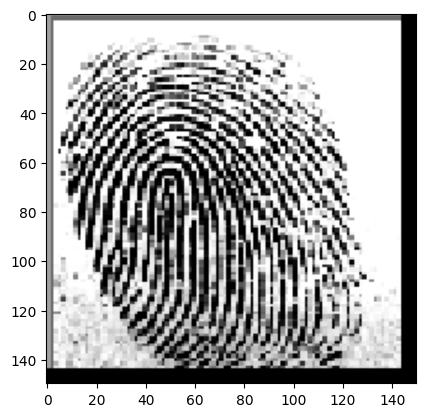

In [14]:
test="/content/drive/MyDrive/Kiemtra_AI/Fingerprint/Fingerprint/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  
  result = int(np.argmax(model_CNN.predict(img),axis =1))

  class_name=['Bác sĩ','Công an','Giáo viên','Họa sĩ','Kỹ sư']
  
  print(' Dự đoán tương lai bạn sẽ là:',class_name[result])
  plt.show()